Name: Al Amin Hossain
Reg.no.: 2020331057
Course Code: 326
Dept of Compter Science & Engineering

Problem statemet: Compute the Discrete Fourier Transform (DFT) and the Inverse Discrete Fourier Transform (IDFT) of a discrete-time signal to analyze its frequency domain characteristics.

Required Library

In [8]:
import numpy as np
import matplotlib.pyplot as plt

Input signal

In [2]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
N = len(x)

DFT Implementation

In [3]:
def DFT(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)
    return X

X_dft = DFT(x)
print("DFT:\n", X_dft)
# xh = np.fft.fft(x)
# print(xh)

DFT:
 [120.  +0.j          -7.5+35.28472582j  -7.5+16.8452758j
  -7.5+10.3228644j   -7.5 +6.75303033j  -7.5 +4.33012702j
  -7.5 +2.43689772j  -7.5 +0.78828176j  -7.5 -0.78828176j
  -7.5 -2.43689772j  -7.5 -4.33012702j  -7.5 -6.75303033j
  -7.5-10.3228644j   -7.5-16.8452758j   -7.5-35.28472582j]


IDFT Implementation

In [4]:
import numpy as np

def IDFT(X):
    N = len(X)
    x = np.zeros(N, dtype=complex)
    for n in range(N):
        for k in range(N):
            x[n] += X[k] * np.exp(2j * np.pi * k * n / N)
    return x / N

# Original signal
# x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

# Compute DFT using numpy
X_dft = np.fft.fft(x)

# Reconstruct using custom IDFT
x_reconstructed = IDFT(X_dft)

# Reconstruct using numpy
x_np_ifft = np.fft.ifft(X_dft)

# Compare
print("Reconstructed (IDFT): ", np.round(x_reconstructed.real, 5))
# print("Reconstructed (ifft): ", np.round(x_np_ifft.real, 5))      #to check if the numpy ifft is same as our IDFT

Reconstructed (IDFT):  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]


Ploting Result in Graph

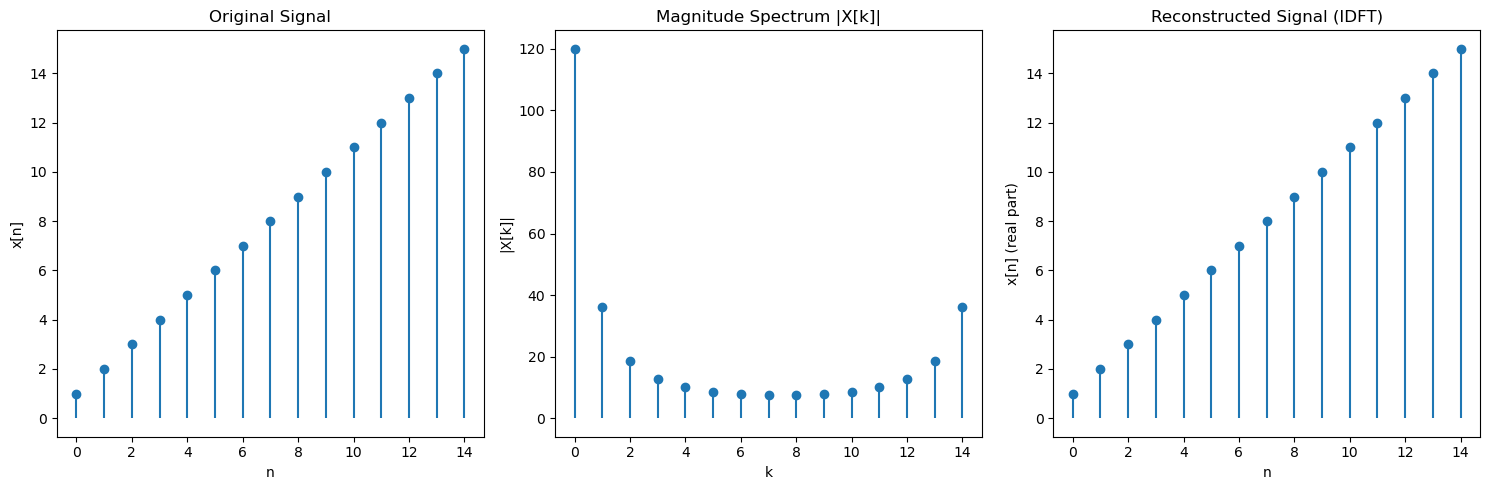

In [6]:
# Plotting
plt.figure(figsize=(15, 5))

# Plot original signal
plt.subplot(1, 3, 1)
plt.stem(range(len(x)), x, basefmt=" ")
plt.title("Original Signal")
plt.xlabel("n")
plt.ylabel("x[n]")

# Plot magnitude spectrum
plt.subplot(1, 3, 2)
plt.stem(range(len(X_dft)), np.abs(X_dft), basefmt=" ")
plt.title("Magnitude Spectrum |X[k]|")
plt.xlabel("k")
plt.ylabel("|X[k]|")

# Plot reconstructed signal
plt.subplot(1, 3, 3)
plt.stem(range(len(x_reconstructed)), x_reconstructed.real, basefmt=" ")
plt.title("Reconstructed Signal (IDFT)")
plt.xlabel("n")
plt.ylabel("x[n] (real part)")

plt.tight_layout()
plt.show()